# Linear Regression on power generation in India from 2017 to 2020.

# Importing the necessary libraries such as numpy, pandas, matplotlib, etc ..,

In [ ]:
# Importing the required libriaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Importing the required dataset. In my case it is Power generation in India form 2017 to 2020.

In [ ]:
# Importing the dataset.
data_frame = pd.read_csv('/content/dataset.csv')

In [ ]:
# Cross verifying / Checking the dataset values.


data_frame

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21
...,...,...,...,...,...,...,...,...,...
4940,305,2020-08-01,Northern,669.47,602.96,26.88,23.41,348.72,351.98
4941,306,2020-08-01,Western,"1,116.00","1,262.10",42.37,36.63,54.67,20.28
4942,307,2020-08-01,Southern,494.66,415.53,61.83,26.28,93.49,77.25
4943,308,2020-08-01,Eastern,482.86,547.03,NaN,NaN,87.22,93.78


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     4945 non-null   float64
 6   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


# Changing values from object to float.

In [ ]:
data_frame ['Thermal Generation Actual (in MU)'] = data_frame['Thermal Generation Actual (in MU)'].str.replace(',','')
data_frame ['Thermal Generation Estimated (in MU)'] =  data_frame['Thermal Generation Estimated (in MU)'].str.replace(',','')

In [ ]:
data_frame['Thermal Generation Actual (in MU)'] = data_frame['Thermal Generation Actual (in MU)'].astype(np.float)
data_frame['Thermal Generation Estimated (in MU)'] = data_frame['Thermal Generation Estimated (in MU)'].astype(np.float)

# Checking/ Verifying the dataset and removing unwanted data and filling null and nan values.

In [ ]:
data_frame.isnull().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [ ]:
data_frame.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [ ]:
data_frame.isna().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [ ]:
data_frame.groupby(by = ['Region']).sum()

,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
Region,,,,,
Eastern,2158427,0.00,0.00,48686.62,52461.95
NorthEastern,2159416,0.00,0.00,17612.32,14058.66
Northern,2155460,26964.08,31378.94,188854.16,201204.03
Southern,2157438,55855.21,46483.24,71109.34,77083.80
Western,2156449,27678.34,31880.85,36235.34,35180.02


In [ ]:
data_frame = data_frame.fillna(0)

In [ ]:
data_frame.groupby(by = ['Region'],as_index = False).sum()

,Region,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,Eastern,2158427,0.00,0.00,48686.62,52461.95
1,NorthEastern,2159416,0.00,0.00,17612.32,14058.66
2,Northern,2155460,26964.08,31378.94,188854.16,201204.03
3,Southern,2157438,55855.21,46483.24,71109.34,77083.80
4,Western,2156449,27678.34,31880.85,36235.34,35180.02


In [ ]:
data_frame.groupby(by = ['Region']).mean()

,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
Region,,,,,
Eastern,2182.433771,0.000000,0.000000,49.228129,53.045450
NorthEastern,2183.433771,0.000000,0.000000,17.808210,14.215025
Northern,2179.433771,27.263984,31.727947,190.954661,203.441891
Southern,2181.433771,56.476451,47.000243,71.900243,77.941153
Western,2180.433771,27.986188,32.235440,36.638362,35.571304


# Data Visualization

## For Nuclear generation.

No handles with labels found to put in legend.


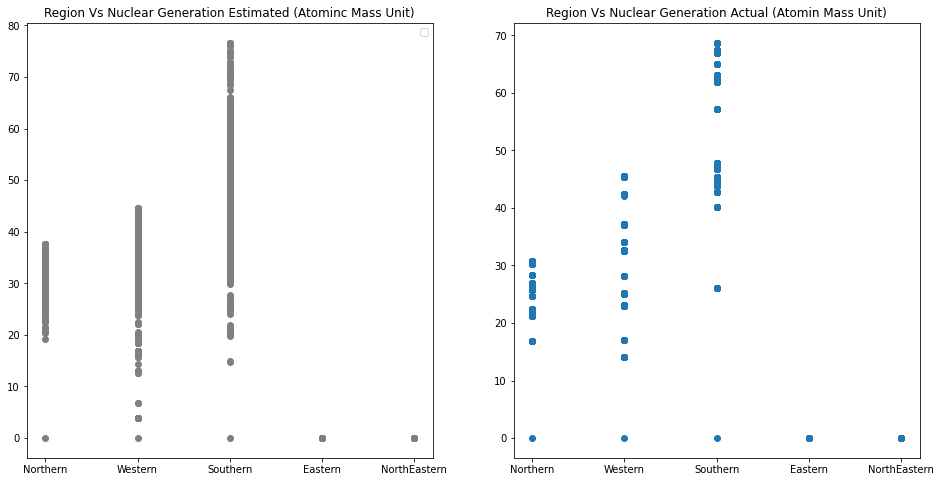

In [ ]:
fig=plt.figure(figsize=(16,8))
axis1= fig.add_subplot(121)
plot1 = plt.scatter(data_frame['Region'],data_frame['Nuclear Generation Estimated (in MU)'],color='grey')
axis1.set_title('Region Vs Nuclear Generation Estimated (Atominc Mass Unit)')
axis2= fig.add_subplot(122)
plot2 = plt.scatter(data_frame['Region'],data_frame['Nuclear Generation Actual (in MU)'])
axis2.set_title('Region Vs Nuclear Generation Actual (Atomin Mass Unit)')
axis1.legend(loc=0)
plt.show()

## For Thermal Generation.

Text(0.5, 1.0, 'Region Vs Thermal Generation Estimated (Atomic Mass Unit)')

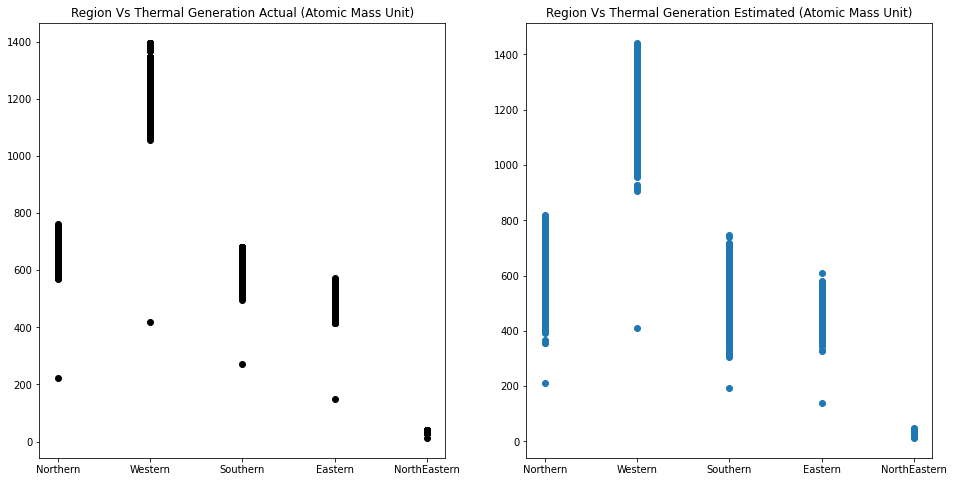

In [ ]:
fig=plt.figure(figsize=(16,8))
axis1= fig.add_subplot(121)
plot1 = plt.scatter(data_frame['Region'],data_frame['Thermal Generation Actual (in MU)'],color='black')
axis1.set_title('Region Vs Thermal Generation Actual (Atomic Mass Unit)')
axis2= fig.add_subplot(122)
plot2 = plt.scatter(data_frame['Region'],data_frame['Thermal Generation Estimated (in MU)'])
axis2.set_title('Region Vs Thermal Generation Estimated (Atomic Mass Unit)')

## For Hydro Generation.

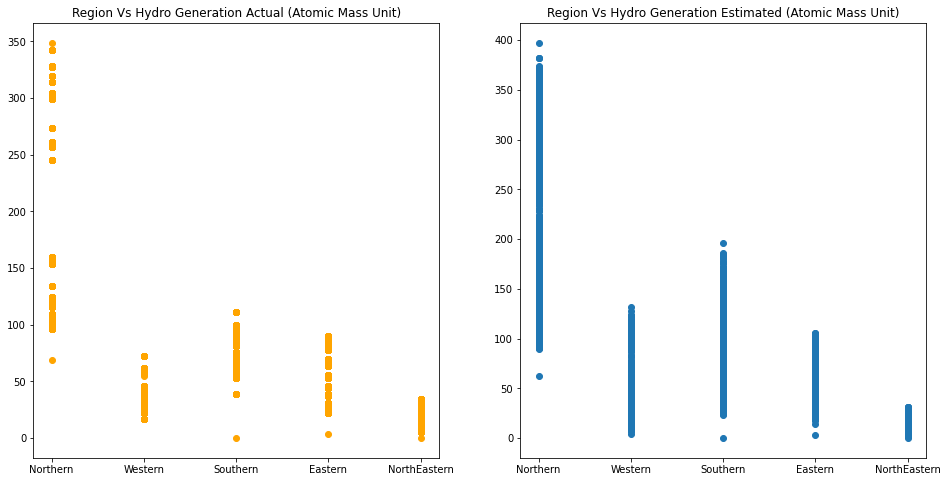

In [ ]:
fig=plt.figure(figsize=(16,8))
axis1= fig.add_subplot(121)
plot1 = plt.scatter(data_frame['Region'],data_frame['Hydro Generation Actual (in MU)'],color='orange')
axis1.set_title('Region Vs Hydro Generation Actual (Atomic Mass Unit)')
axis2= fig.add_subplot(122)
plot2 = plt.scatter(data_frame['Region'],data_frame['Hydro Generation Estimated (in MU)'])
axis2.set_title('Region Vs Hydro Generation Estimated (Atomic Mass Unit)')
plt.show()

# Regression

## Hydro Generation

In [ ]:
mean_of_power = data_frame.groupby('Date',as_index=False).mean()

In [ ]:
mean_of_power

,Date,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,2,555.582,506.478,23.652,17.836,113.484,99.538
1,2017-09-02,7,555.582,512.674,23.652,18.456,113.484,99.128
2,2017-09-03,12,555.554,506.646,23.652,18.514,113.484,94.610
3,2017-09-04,17,555.554,542.856,23.652,18.524,113.484,100.072
4,2017-09-05,22,558.170,555.930,23.652,18.542,113.484,94.032
...,...,...,...,...,...,...,...,...
984,2020-07-28,287,592.326,597.208,26.216,17.864,105.154,117.900
985,2020-07-29,292,592.326,583.772,26.216,18.056,105.154,113.962
986,2020-07-30,297,594.872,576.776,26.216,17.128,105.154,113.956
987,2020-07-31,302,596.800,588.622,26.216,17.134,105.154,115.826


In [ ]:
mean_of_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  989 non-null    object 
 1   index                                 989 non-null    int64  
 2   Thermal Generation Actual (in MU)     989 non-null    float64
 3   Thermal Generation Estimated (in MU)  989 non-null    float64
 4   Nuclear Generation Actual (in MU)     989 non-null    float64
 5   Nuclear Generation Estimated (in MU)  989 non-null    float64
 6   Hydro Generation Actual (in MU)       989 non-null    float64
 7   Hydro Generation Estimated (in MU)    989 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 69.5+ KB


In [ ]:
mean_of_thermal = mean_of_power [['Hydro Generation Estimated (in MU)','Hydro Generation Actual (in MU)']] 

In [ ]:
mean_of_thermal

,Hydro Generation Estimated (in MU),Hydro Generation Actual (in MU)
0,99.538,113.484
1,99.128,113.484
2,94.610,113.484
3,100.072,113.484
4,94.032,113.484
...,...,...
984,117.900,105.154
985,113.962,105.154
986,113.956,105.154
987,115.826,105.154


In [ ]:
x = mean_of_thermal [['Hydro Generation Estimated (in MU)']].values

y  = mean_of_thermal [['Hydro Generation Actual (in MU)']].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 1)

In [ ]:
regression = linear_model.LinearRegression()
model = regression.fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)

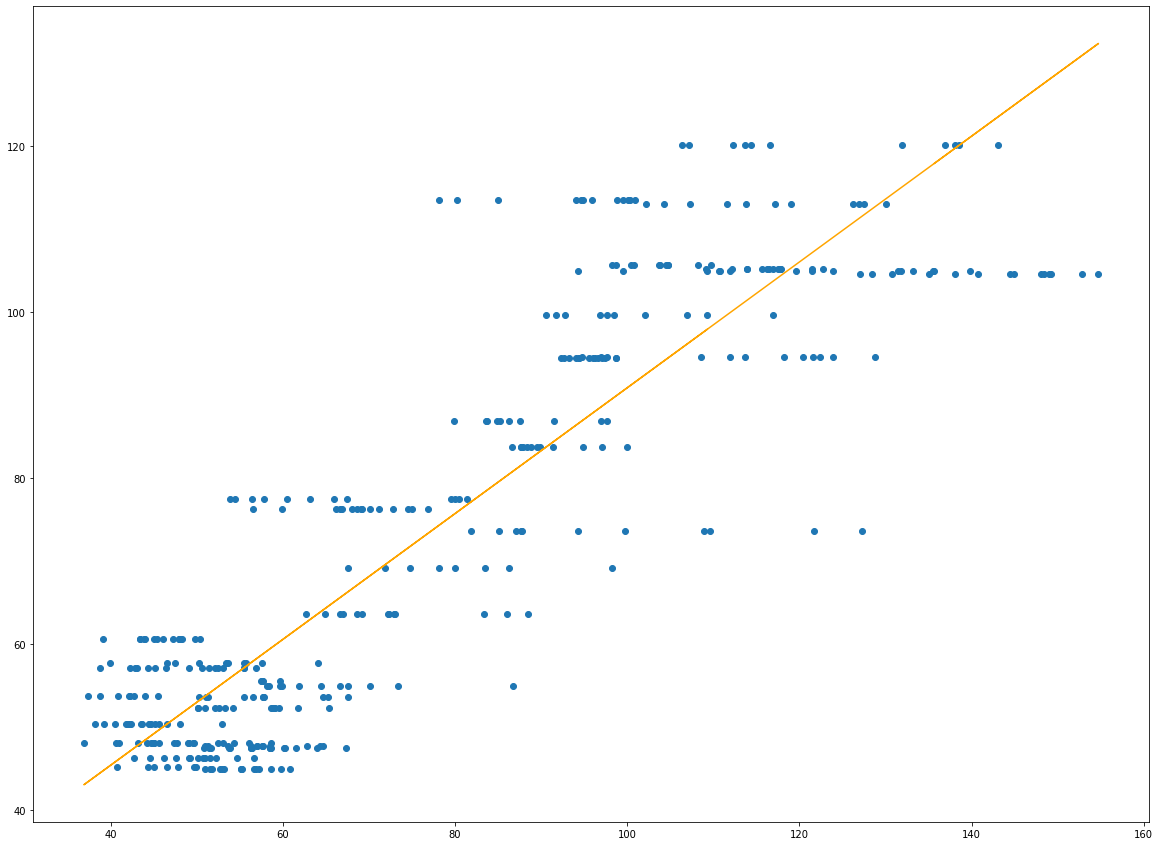

In [ ]:
plt.figure(figsize = (20,15))

plt.scatter(x_test,y_test)

plt.plot(x_test,prediction,color = 'orange')

In [ ]:
Training_score = {regression.score(x_train,y_train)}

print('The Training Score is : {}.'.format(Training_score))

The Training Score is : {0.8113740597539824}.


In [ ]:
Result = r2_score(y_test,prediction)

print('The result is : {}.'.format(Result))

The result is : 0.7882441826995892.


## Nuclear Generation

In [ ]:
mean_of_power

,Date,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,2,555.582,506.478,23.652,17.836,113.484,99.538
1,2017-09-02,7,555.582,512.674,23.652,18.456,113.484,99.128
2,2017-09-03,12,555.554,506.646,23.652,18.514,113.484,94.610
3,2017-09-04,17,555.554,542.856,23.652,18.524,113.484,100.072
4,2017-09-05,22,558.170,555.930,23.652,18.542,113.484,94.032
...,...,...,...,...,...,...,...,...
984,2020-07-28,287,592.326,597.208,26.216,17.864,105.154,117.900
985,2020-07-29,292,592.326,583.772,26.216,18.056,105.154,113.962
986,2020-07-30,297,594.872,576.776,26.216,17.128,105.154,113.956
987,2020-07-31,302,596.800,588.622,26.216,17.134,105.154,115.826


In [ ]:
x = mean_of_power [['Nuclear Generation Actual (in MU)']].values

y  = mean_of_power [['Nuclear Generation Estimated (in MU)']].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 1)

In [ ]:
regression = linear_model.LinearRegression()
model = regression.fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)

No handles with labels found to put in legend.


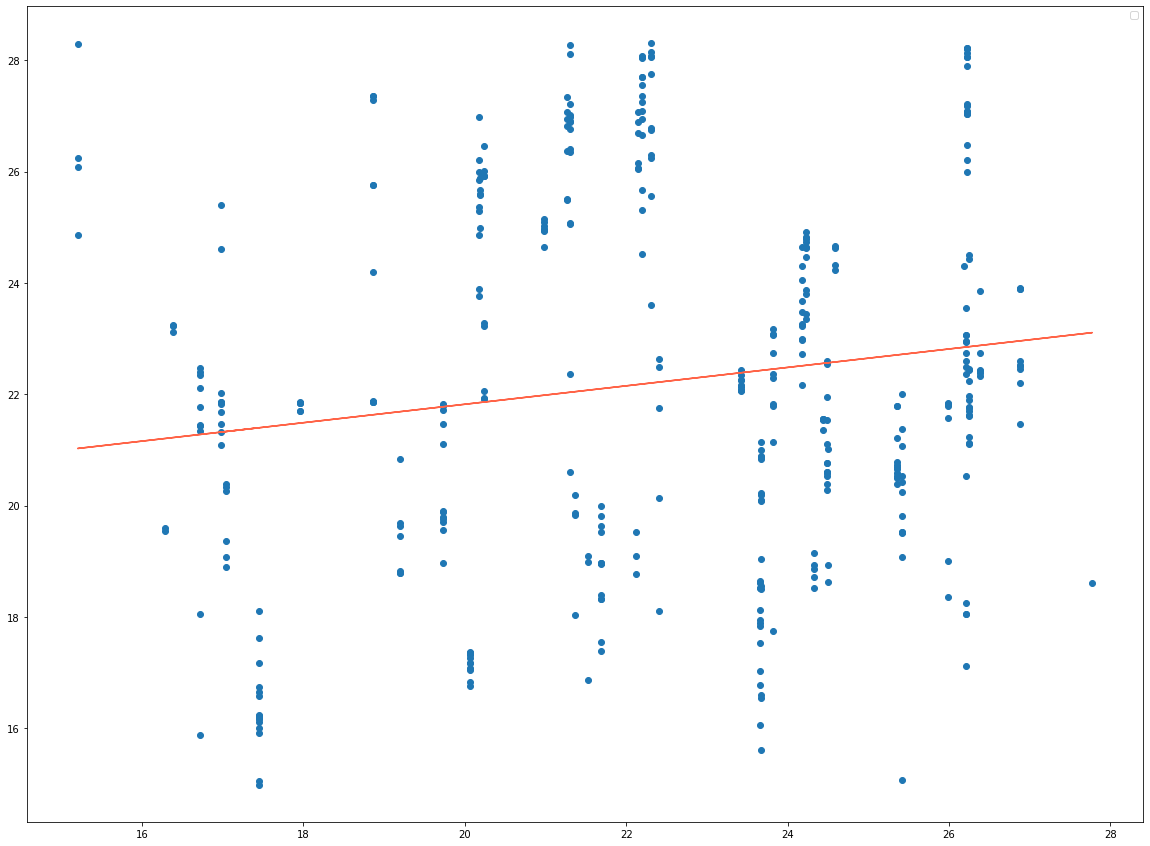

In [ ]:
plt.figure(figsize = (20,15))

plt.scatter(x_test,y_test)

plt.plot(x_test,prediction,color = 'tomato')
plt.legend()